# Stock analysis

## Import

Libraries

In [1]:
from utils.init import *

from utils.analyse_price import *
from utils.analyse_fundamentals import *
from utils.data import *
from utils.params import *
from utils.pdf import *

In [2]:
TICKER = 'TWE'
COUNTRY = 'AU'
first_end_of_quarter = '2020-06'
last_end_of_quarter = '2024-06'
historical_prices_dict = {}

## Get data

Run data

69 ConsumerDefensive BeveragesWineries&Distilleries


,ASX code,Market Cap,weight
1898,WOW,4.032470e+10,0.415184
463,COL,2.387053e+10,0.245772
606,EDV,8.847441e+09,0.091094
25,A2M,4.575801e+09,0.047113
905,IEL,4.236277e+09,0.043617
1197,MTS,3.907838e+09,0.040235
790,GNC,2.059414e+09,0.021204
286,BGA,1.587880e+09,0.016349
622,ELD,1.349671e+09,0.013896
771,GEM,1.141404e+09,0.011752


,ASX code,Market Cap ($bn)
1796,TWE,9.78


0.1


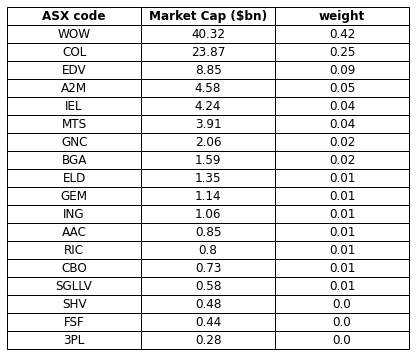

$EDV.AX: possibly delisted; no price data found  (1d 2019-06-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1559311200, endDate = 1577710800")
$CBO.AX: possibly delisted; no price data found  (1d 2019-06-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1559311200, endDate = 1577710800")
$EDV.AX: possibly delisted; no price data found  (1d 2020-01-01 -> 2020-12-31) (Yahoo error = "Data doesn't exist for startDate = 1577797200, endDate = 1609333200")
$CBO.AX: possibly delisted; no price data found  (1d 2020-01-01 -> 2020-12-31) (Yahoo error = "Data doesn't exist for startDate = 1577797200, endDate = 1609333200")


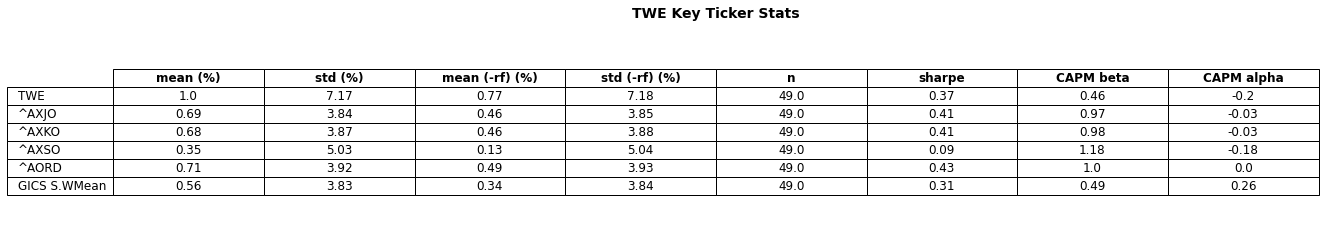

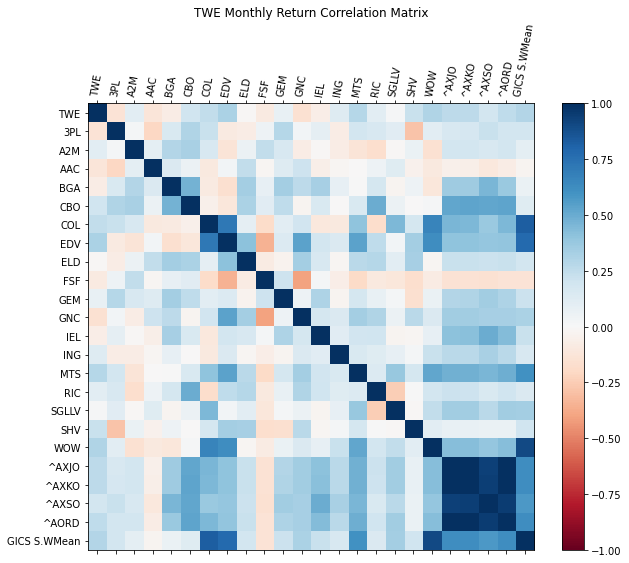

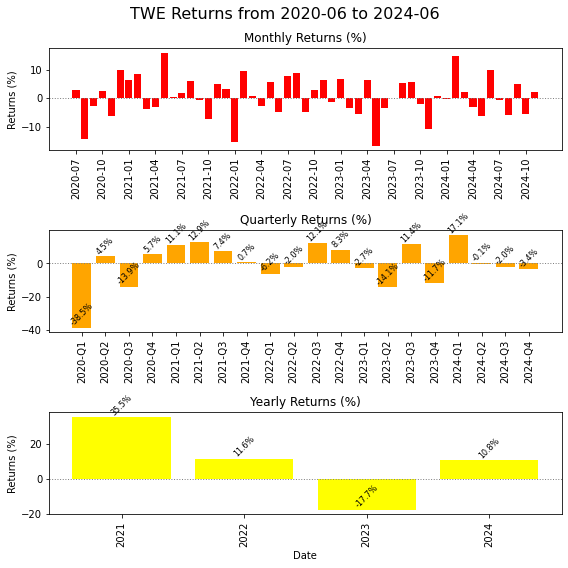

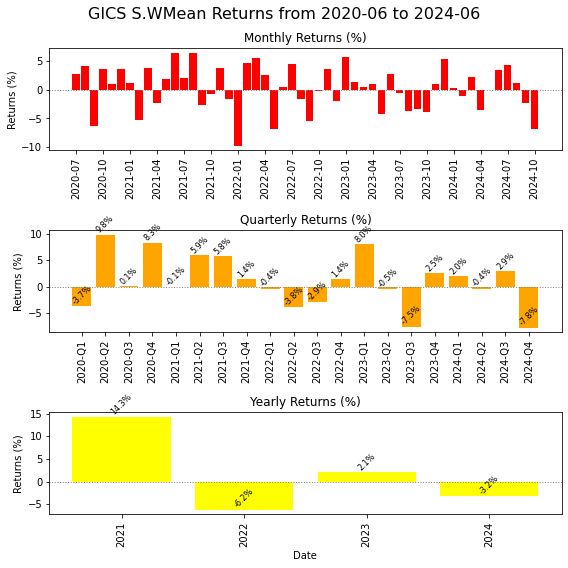

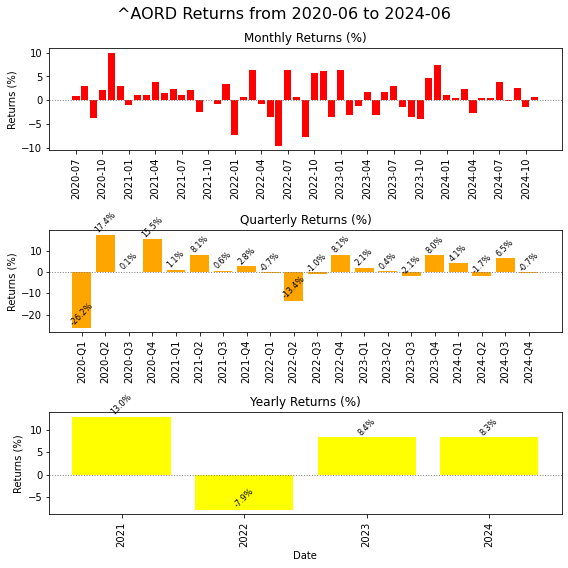

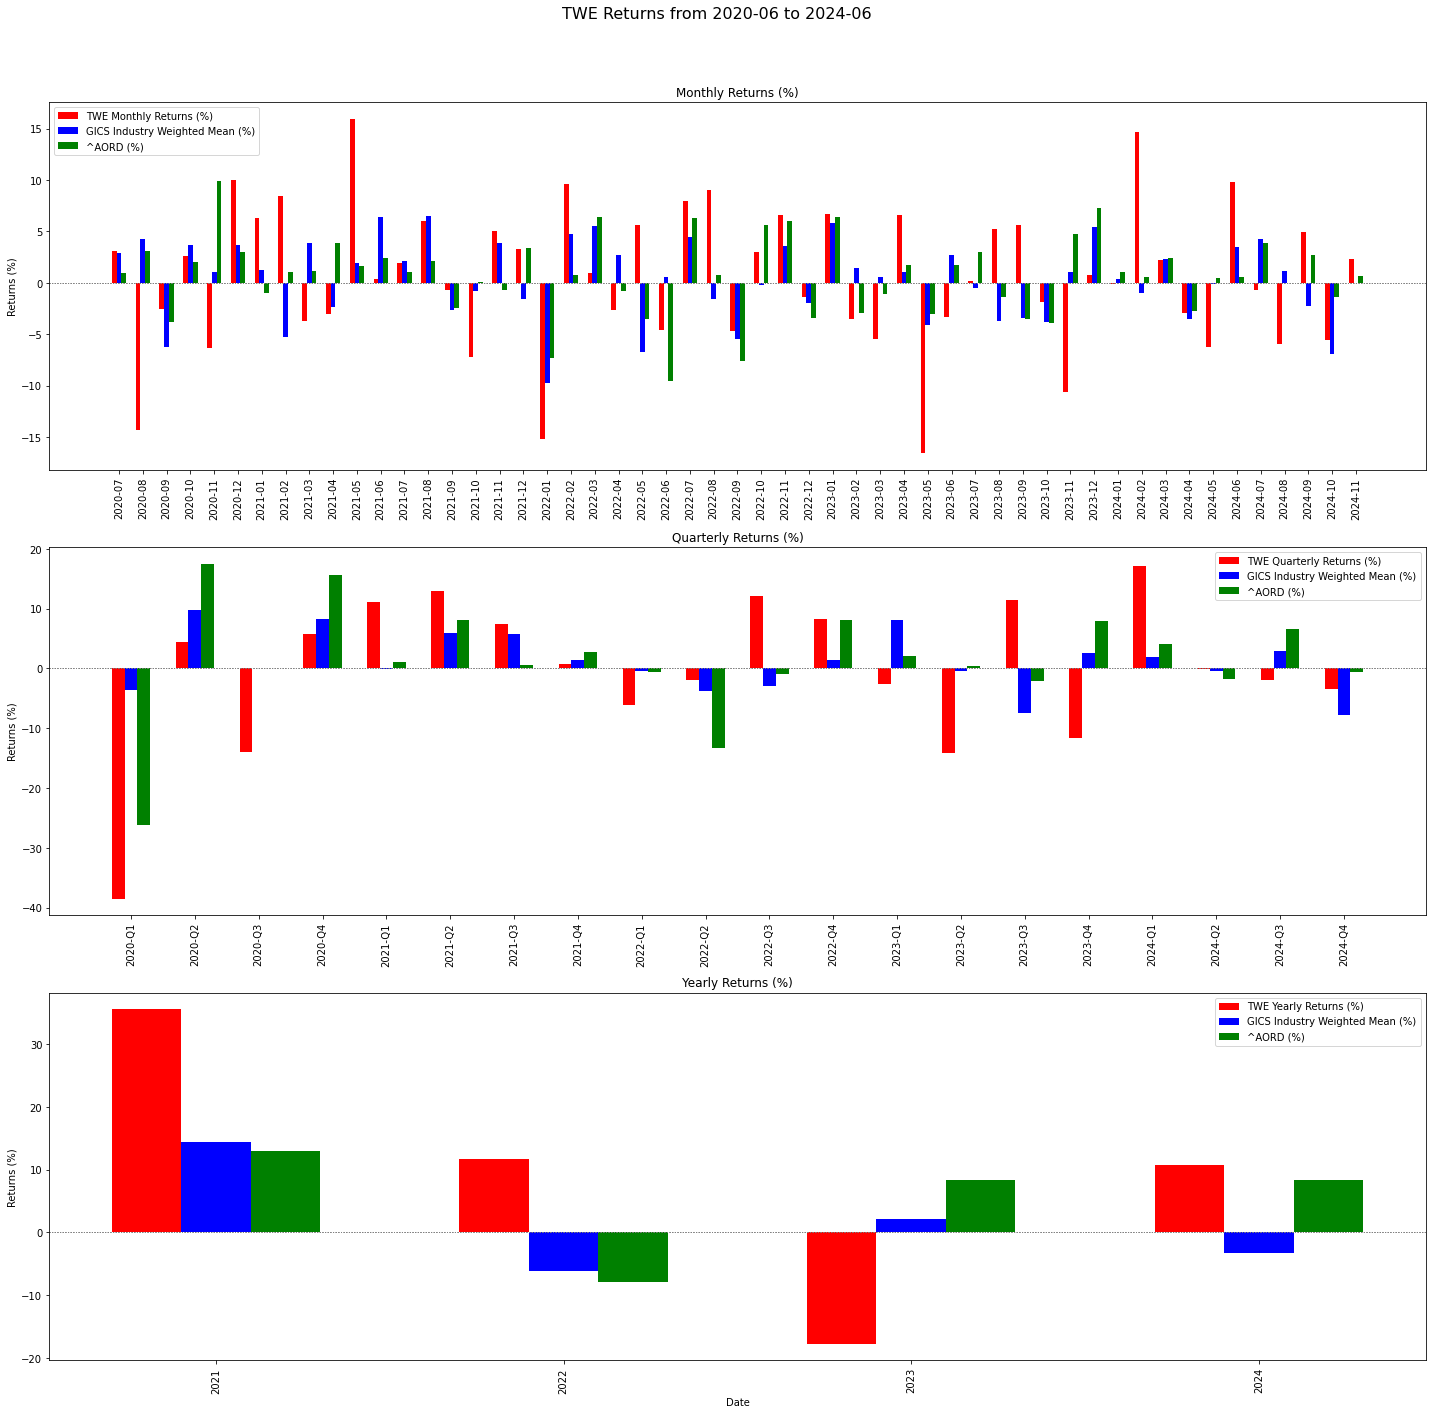

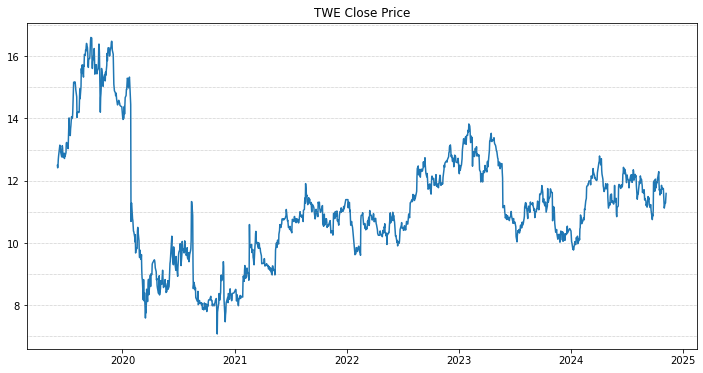

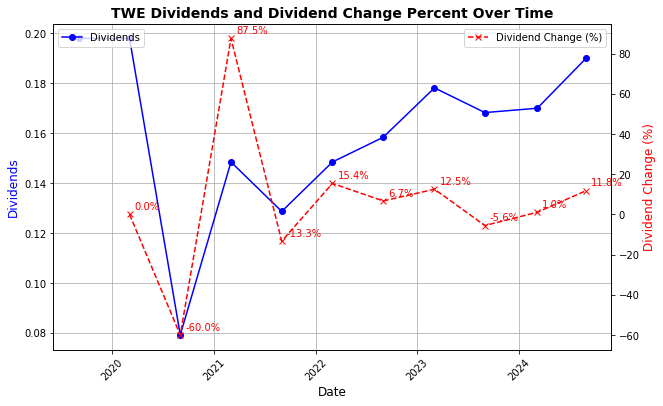

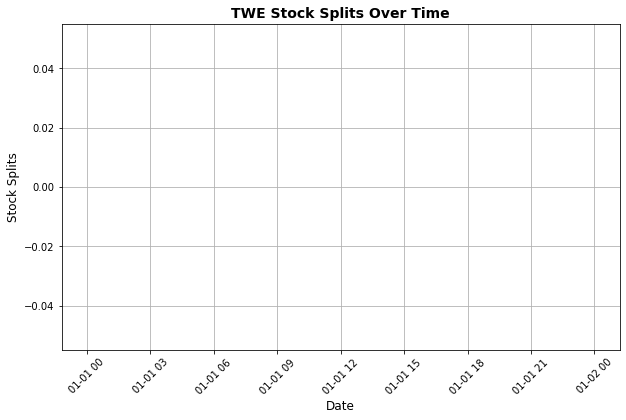

In [3]:
# read in data
index_tickers_list = get_index_tickers_list(COUNTRY)
interest_rate_df_dict = get_interest_rate(COUNTRY)

comparable_tickers = {'type': {}, 'list': []}
if COUNTRY == 'AU':
    asx_companies_directory_df = get_asx_companies_directory()
    asx_gics_df = get_asx_gics()

    # get same gics tickers
    market_value_rank = get_market_value_rank(
        TICKER, asx_gics_df)
    AU_top_list_dict = get_top_ASX_companies_list(asx_companies_directory_df)
    ASX_ticker_gics_dict = get_ASX_ticker_gics(TICKER, asx_gics_df)
    same_gics_ASX_tickers_dict = get_same_gics_ASX_tickers(asx_gics_df,
                                                           ASX_ticker_gics_dict, AU_top_list_dict)
    comparable_ASX_tickers_dict = get_comparable_ASX_tickers(
        TICKER, same_gics_ASX_tickers_dict)

    print(market_value_rank,
          ASX_ticker_gics_dict['Sector'], ASX_ticker_gics_dict['Industry'])

    same_industry_ASX_tickers_mcap_df = get_same_gics_ASX_MCap_weights(TICKER,
                                                                       asx_companies_directory_df, comparable_ASX_tickers_dict)

    # market value and weight
    same_industry_tickers_mcap_df = get_same_industry_tickers_mcap(
        same_industry_ASX_tickers_mcap_df)
    display(same_industry_tickers_mcap_df)

    ticker_mv_df = get_AU_ticker_mv_df(asx_companies_directory_df, TICKER)
    display(ticker_mv_df)

    ticker_proportion_of_market = get_AU_ticker_proportion_of_market(
        ticker_mv_df, same_industry_tickers_mcap_df)
    print(round(ticker_proportion_of_market, 2))

    plot_gics_mcap_weights(TICKER, same_industry_tickers_mcap_df)

    same_gics_industry_weight_dict = get_same_AU_gics_industry_weight_dict(
        same_industry_tickers_mcap_df)

# get historic prices
analysis_needed_ticker_list = get_analysis_needed_ticker_list(
    TICKER, index_tickers_list, comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)
historical_prices_dict = get_historical_prices_for_interested_list(
    analysis_needed_ticker_list, index_tickers_list, historical_prices_dict, COUNTRY)

# get historical returns
monthly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    monthly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['monthly'], 'M')

quarterly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    quarterly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['quarterly'], 'Q')

yearly_returns_df_dict = {}
for ticker, price_df in historical_prices_dict.items():
    yearly_returns_df_dict[ticker] = get_return(
        price_df, interest_rate_df_dict['annualy'], 'Y')

# get GICS industry weighted returns
monthly_returns_df_dict = get_gics_industry_weighted_mean(
    monthly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if COUNTRY == 'AU' else None,
    index_tickers_list, 'M', comparable_tickers=comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)
quarterly_returns_df_dict = get_gics_industry_weighted_mean(
    quarterly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if COUNTRY == 'AU' else None,
    index_tickers_list, 'Q', comparable_tickers=comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)
yearly_returns_df_dict = get_gics_industry_weighted_mean(
    yearly_returns_df_dict, TICKER, analysis_needed_ticker_list, same_gics_industry_weight_dict if COUNTRY == 'AU' else None,
    index_tickers_list, 'Y', comparable_tickers=comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers)

# get stats based on returns
stats_df = get_monthly_stats_for_all_tickers(
    monthly_returns_df_dict, comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers, index_tickers_list, same_industry_ASX_tickers_mcap_df if TICKER == 'AU' else None, TICKER, first_end_of_quarter, last_end_of_quarter, COUNTRY)
plot_key_ticker_stats_table(
    stats_df, TICKER, comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers, index_tickers_list)

# correlation chart
correlation_df, period_of_interest_return_df = historical_corr(
    monthly_returns_df_dict, first_end_of_quarter, last_end_of_quarter)
plot_correlation(correlation_df, ticker=TICKER)

# plot returns
# interested ticker
plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                'quarterly_returns_df_dict': quarterly_returns_df_dict,
                'yearly_returns_df_dict': yearly_returns_df_dict, 'ticker': TICKER,
                'first_end_of_quarter': first_end_of_quarter,
                'last_end_of_quarter': last_end_of_quarter})

if COUNTRY == 'AU' and len(comparable_ASX_tickers_dict['list']) > 0:
    plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                    'quarterly_returns_df_dict': quarterly_returns_df_dict,
                    'yearly_returns_df_dict': yearly_returns_df_dict,
                    'ticker': 'GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else 'GICS S.WMean',
                    'first_end_of_quarter': first_end_of_quarter,
                    'last_end_of_quarter': last_end_of_quarter,
                    'underlying_ticker': TICKER})

plot_returns(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                'quarterly_returns_df_dict': quarterly_returns_df_dict,
                'yearly_returns_df_dict': yearly_returns_df_dict, 'ticker': '^AORD' if COUNTRY == 'AU' else '^GSPC',
                'first_end_of_quarter': first_end_of_quarter,
                'last_end_of_quarter': last_end_of_quarter})

plot_returns_comparative(**{'monthly_returns_df_dict': monthly_returns_df_dict,
                            'quarterly_returns_df_dict': quarterly_returns_df_dict,
                            'yearly_returns_df_dict': yearly_returns_df_dict, 'TICKER': TICKER,
                            'first_end_of_quarter': first_end_of_quarter,
                            'last_end_of_quarter': last_end_of_quarter,
                            'comparable_tickers': comparable_ASX_tickers_dict if COUNTRY == 'AU' else comparable_tickers, 'country': COUNTRY}
                         )

# price movement
plot_close_price_with_dollar_lines(TICKER, historical_prices_dict)

# dividends
historical_dividends = get_historical_dividends(
    TICKER, historical_prices_dict, COUNTRY)
plot_dividends(TICKER, historical_dividends, historical_prices_dict, COUNTRY)

# historical splits
historical_splits = get_historical_splits(
    TICKER, historical_prices_dict, COUNTRY)
plot_splits_over_time(TICKER, historical_prices_dict, COUNTRY)

# Fundamentals

Missing data for financials table for ticker TWE: 'Total Expenses'


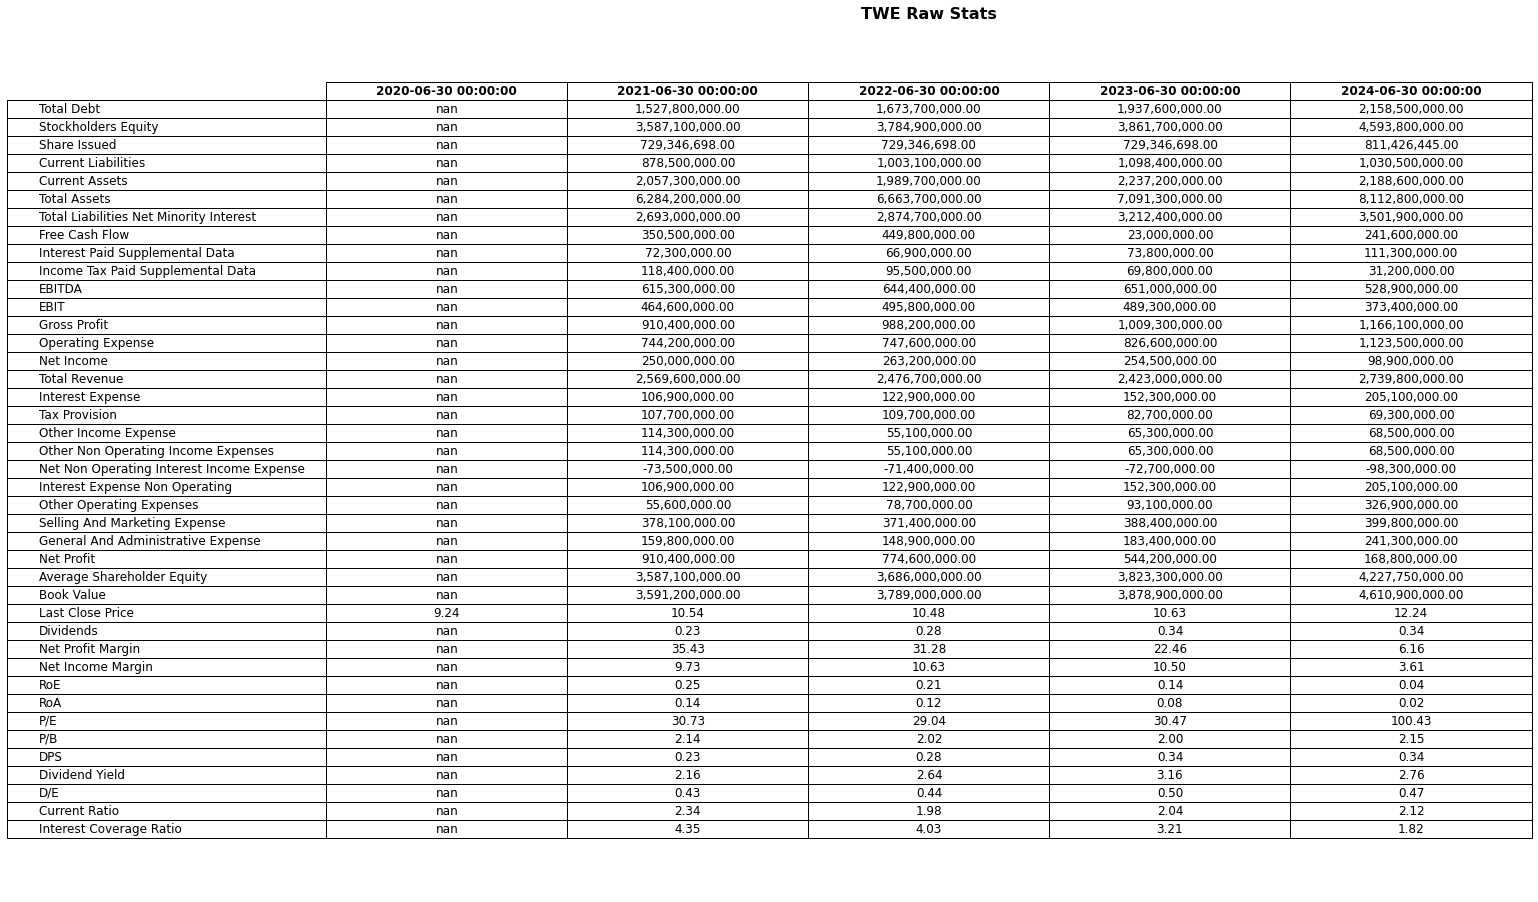

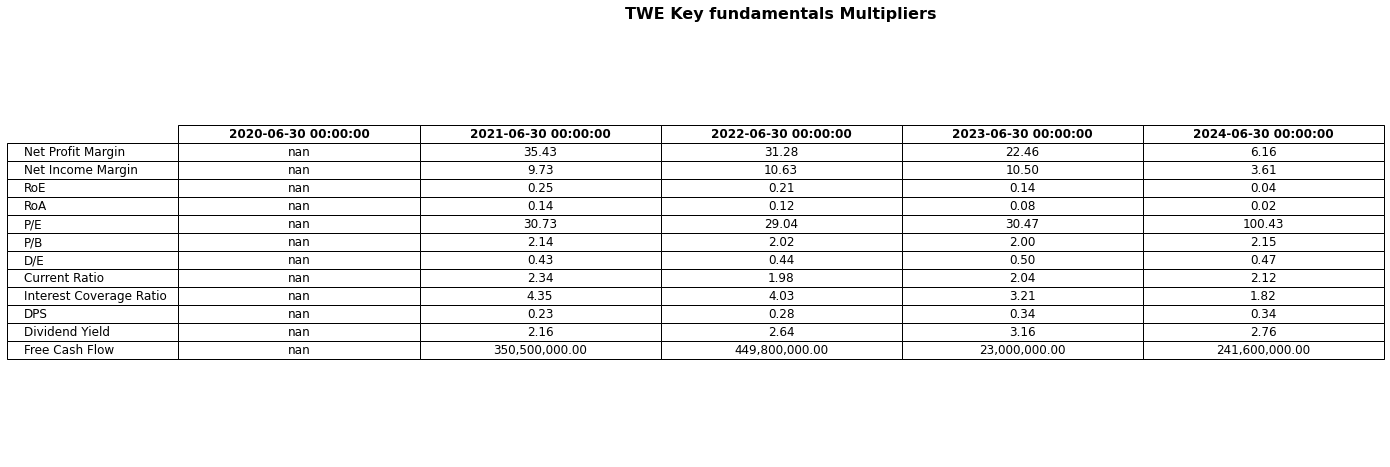

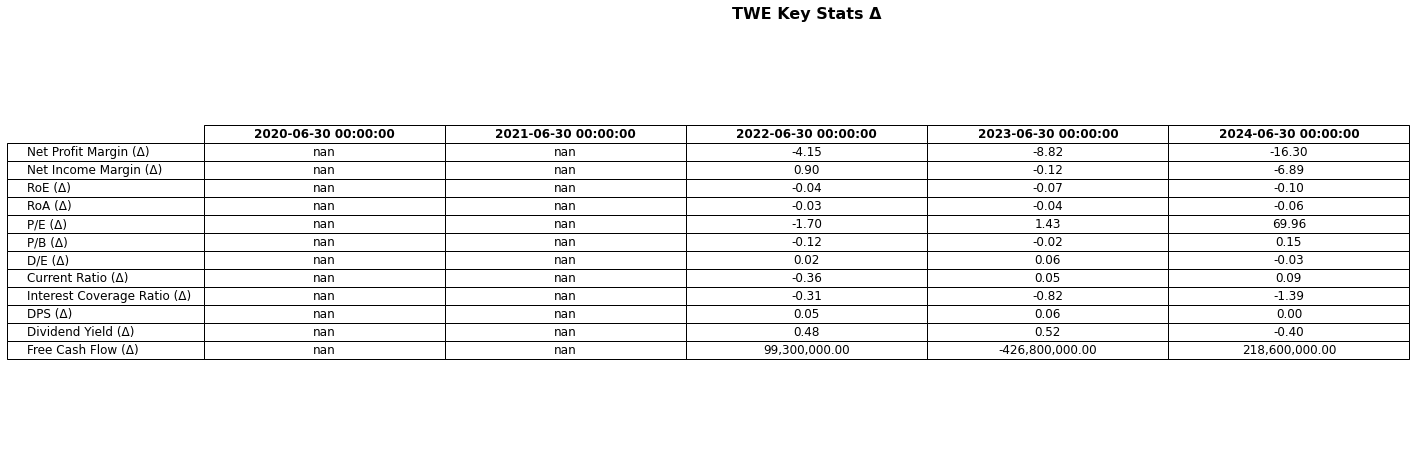


 3PL
Missing data for financials table for ticker 3PL: 'Total Expenses'

 A2M
Missing data for financials table for ticker A2M: 'Total Expenses'

 AAC
Missing column from cashflow table for ticker AAC: 'Income Tax Paid Supplemental Data'
Missing data for financials table for ticker AAC: 'Total Expenses'
Missing data for financials table for ticker AAC: 'Selling And Marketing Expense'

 BGA
Missing data for financials table for ticker BGA: 'Total Expenses'

 CBO
Missing data for financials table for ticker CBO: 'Total Expenses'

 COL
Missing data for financials table for ticker COL: 'Total Expenses'

 EDV
Missing data for financials table for ticker EDV: 'Total Expenses'
Missing data for financials table for ticker EDV: 'Selling And Marketing Expense'

 ELD
Missing data for financials table for ticker ELD: 'Total Expenses'

 FSF
Missing column from balance sheet for ticker FSF: 'Current Liabilities'
Missing column from balance sheet for ticker FSF: 'Current Assets'
Missing column from 

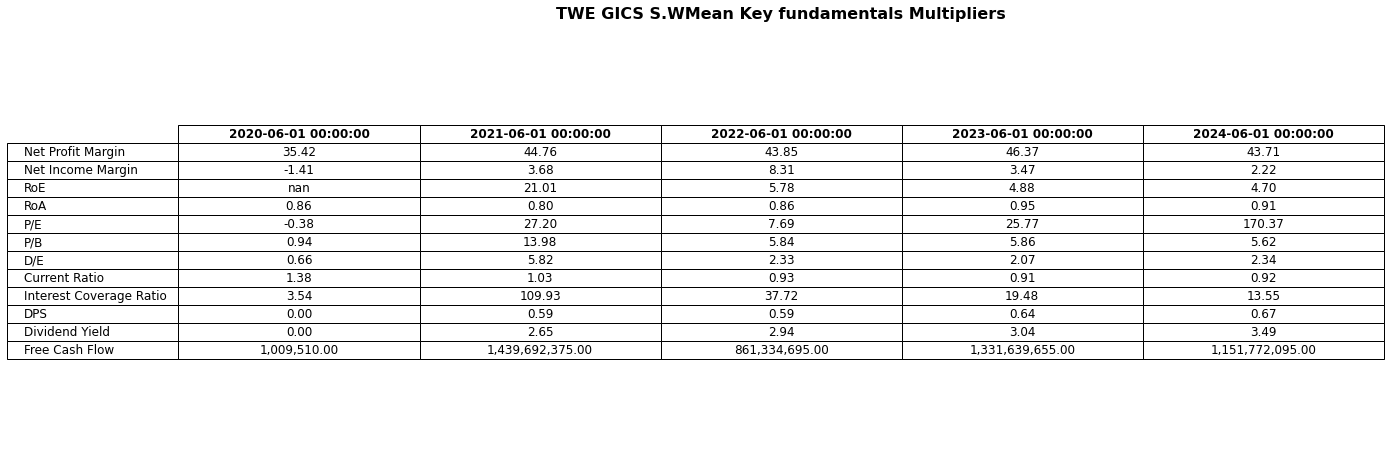

In [4]:
got_fundamentals = False

if not (COUNTRY == 'AU' and ASX_ticker_gics_dict['Sector'] == 'Unknown' and ASX_ticker_gics_dict['Industry'] == 'Unknown'):

    got_fundamentals = True

    # get fundamentals for ticker of interest
    interested_ticker_raw_fundamentals_stats, \
        interested_ticker_key_interested_fundamentals_stats, \
        interested_ticker_key_interested_fundamentals_stats_diff, \
        object = get_fundamentals_dfs(
            first_end_of_quarter, historical_prices_dict,
            TICKER, COUNTRY)
    # create tables for fundamentals for ticker of interest
    plot_raw_fundamentals_stats_table(
        interested_ticker_raw_fundamentals_stats, TICKER)
    plot_key_fundamentals_multipliers_table(
        interested_ticker_key_interested_fundamentals_stats, TICKER)
    plot_key_fundamentals_multipliers_diff_table(
        interested_ticker_key_interested_fundamentals_stats_diff, TICKER)

    # get fundamentals for comparable tickers
    if COUNTRY == 'AU':

        # get raw fundamentals stats for comparable tickers
        raw_fundamentals_stats_dict, key_interested_stats_dict, object_dict = get_raw_fundamentals_stats(
            comparable_ASX_tickers_dict, first_end_of_quarter, historical_prices_dict, COUNTRY)

        # aggregate and integrate the fundamentals stats for comparable tickers
        agg_interpolated_fundamentals_stats_df_dict = get_agg_interpolated_fundamentals_stats(
            raw_fundamentals_stats_dict, interested_ticker_key_interested_fundamentals_stats_diff)

        # get key interested fundamental stats from the interpolated fundamentals for comparable tickers
        key_interested_fundamentals_stats_dict, key_interested_fundamentals_stats_diff_dict = get_key_interested_fundamentals_stats_for_comparable(
            agg_interpolated_fundamentals_stats_df_dict, object_dict, first_end_of_quarter, historical_prices_dict)

        # get weighted average of the key interested fundamentals stats for the GICS industry
        weighted_GICS_key_interested_fundamentals_stats = get_weighted_fundamentals(
            key_interested_fundamentals_stats_dict, same_gics_industry_weight_dict)
        weighted_GICS_key_interested_fundamentals_stats.index = weighted_GICS_key_interested_fundamentals_stats.index

        plot_key_fundamentals_multipliers_table(
            weighted_GICS_key_interested_fundamentals_stats.astype(float).round(2),  f'{TICKER} GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else f'{TICKER} GICS S.WMean')

        # get percentage change for key interested fundamental stats for the weighted average of the GICS industry
        weighted_GICS_key_interested_fundamentals_stats_diff = get_key_interested_fundamentals_stat_diff(
            weighted_GICS_key_interested_fundamentals_stats)
        weighted_GICS_key_interested_fundamentals_stats_diff.index = interested_ticker_key_interested_fundamentals_stats_diff.index

        plot_key_fundamentals_multipliers_diff_table(
            weighted_GICS_key_interested_fundamentals_stats_diff, f'{TICKER} GICS I.WMean' if 'industry' in comparable_ASX_tickers_dict['type'] else f'{TICKER} GICS S.WMean')

    else:
        weighted_GICS_key_interested_fundamentals_stats = pd.DataFrame()

    # plot the comparison of key interested fundamentals for the ticker of interest and the weighted average of the GICS industry
    plot_key_fundamentals_multipliers(
        interested_ticker_key_interested_fundamentals_stats, weighted_GICS_key_interested_fundamentals_stats, TICKER, {})

PDF

In [5]:
create_pdf(**{
    'ASX_ticker_gics_dict': ASX_ticker_gics_dict,
    'comparable_ASX_tickers_dict': comparable_ASX_tickers_dict,
    'ticker_mv_df': ticker_mv_df,
    'same_industry_tickers_mcap_df': same_industry_tickers_mcap_df,
    'got_fundamentals': got_fundamentals,
    'TICKER': TICKER,
    'COUNTRY': COUNTRY,
    'market_value_rank': market_value_rank
})